# **Preserving Phylogenetic Signal in High-Dimensional Metagenomic Data: A Comparative Analysis of GPU-Accelerated Dimensionality Reduction Techniques for 16S rRNA Taxonomic Classification!**

# **`1. Tools Bantuan`**

In [ ]:
!rm -rf /kaggle/working/FASTA-KmerReduce/FASTA-KmerReduce

In [ ]:
!rm -rf /kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/species/k8/label_encoder_k8_species_NEW.pkl

In [ ]:
cd /

In [ ]:
cd /kaggle/working

In [ ]:
!mv /kaggle/working/rki_2025/prep/vectorization_config/all_vectorization_output_paths.txt  /kaggle/working/rki_2025/prep/vectorization_config/all_vectorization_output_paths_1.txt

In [ ]:
with open("catatan.txt", "r") as file:
    isi = file.readlines()  # Membaca per baris
    
# Ganti baris pertama
isi[0] = "Halo Kaggle\n"

# Nambah baris baru
isi.append("Ini baris tambahan\n")

# Tulis Ulang
with open("catatan.txt", "w") as file:
    file.writelines(isi)

# Lihat Hasilnya
with open("catatan.txt", "r") as file:
    print(file.read())


# **`2. Installasi & Import`**

In [1]:
import sys
import time
import contextlib
with open('install.log', 'a') as inpt:
    with contextlib.redirect_stdout(inpt):

        # -- Start installation --
        start = time.time()
        ! pip install gdown biopython memory_profiler
        import pandas as pd
        end = time.time()
        # -- End installation --
print(f'+ Time elapsed: ' + time.strftime('%Mm %Ss', time.gmtime(end - start)))

+ Time elapsed: 00m 01s


In [2]:
# Clone repo tapi hanya ambil struktur (tanpa file dulu)
!git clone --depth 1 --filter=blob:none --sparse https://github.com/setiawantirta/FASTA-KmerReduce.git

# Masuk ke repo
%cd FASTA-KmerReduce

# Aktifkan sparse checkout hanya untuk folder 'benchmark'
!git sparse-checkout set benchmark

# Lihat hasilnya
!ls benchmark

Cloning into 'FASTA-KmerReduce'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.10 MiB | 20.05 MiB/s, done.
/kaggle/working/FASTA-KmerReduce
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 23 (delta 8), reused 20 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 167.43 KiB | 7.61 MiB/s, done.
Resolving deltas: 100% (8/8), done.
create_folder.py	 feature_reduction_v4.py  __pycache__
extract_split.py	 __init__.py		  training.py
feature_reduction.py	 loader.p

In [8]:
def reload_and_import_benchmark(import_mode="all"):
    """
    Fungsi untuk reload dan import dari package benchmark
    
    Parameters:
    import_mode (str): "all" untuk import *, "specific" untuk import fungsi tertentu
    """
    import importlib
    import sys
    import os
    import sys
    #sys.path.append("/kaggle/working/FASTA-KmerReduce")

    print(f"🔄 Starting reload and import process (mode: {import_mode})...")
    
    # 🔧 FIX 1: Set environment variable untuk disable GPU sebelum import
    os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable all GPUs
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'   # Suppress TensorFlow warnings
    
    # 🔧 FIX 2: Daftar modul dengan urutan yang benar (parent dulu)
    benchmark_modules = [
        'benchmark',                    # Parent package HARUS pertama
        'benchmark.create_folder',      
        'benchmark.loader', 
        'benchmark.extract_split', 
        'benchmark.feature_reduction', 
        'benchmark.training'
    ]
    
    # Reload semua modul dengan error handling yang lebih baik
    for module_name in benchmark_modules:
        if module_name in sys.modules:
            try:
                importlib.reload(sys.modules[module_name])
                print(f"   ♻️ Reloaded: {module_name}")
            except Exception as e:
                print(f"   ⚠️ Failed to reload {module_name}: {e}")
        else:
            # 🔧 FIX 3: Import module jika belum ada di sys.modules
            try:
                __import__(module_name)
                print(f"   ✨ Imported (new): {module_name}")
            except Exception as e:
                print(f"   ⚠️ Failed to import {module_name}: {e}")
    
    # Import berdasarkan mode dengan error handling
    try:
        # 🔧 FIX 4: Pastikan parent package di-import terlebih dahulu
        import benchmark
        
        if import_mode == "all":
            # Import ALL functions explicitly
            import benchmark.create_folder as cf_module
            import benchmark.loader as loader_module
            import benchmark.extract_split as es_module
            import benchmark.feature_reduction as fr_module
            import benchmark.training as training_module
            
            # Get all public functions from each module
            for module_name, module in [
                ('create_folder', cf_module),
                ('loader', loader_module), 
                ('extract_split', es_module),
                ('feature_reduction', fr_module),
                ('training', training_module)
            ]:
                for attr_name in dir(module):
                    if not attr_name.startswith('_') and callable(getattr(module, attr_name)):
                        globals()[attr_name] = getattr(module, attr_name)
            
            print("✅ ALL functions imported explicitly")
            
        elif import_mode == "specific":
            # Import specific functions
            from benchmark.create_folder import create_project_folders
            from benchmark.loader import load_, run_extract_, load_all_csv_data
            from benchmark.extract_split import main_vectorization_process
            from benchmark.feature_reduction import benchmark_
            from benchmark.training import validate_naive_bayes_simple
            
            # Update globals
            globals().update({
                'create_project_folders': create_project_folders,
                'load_': load_,
                'run_extract_': run_extract_,
                'load_all_csv_data': load_all_csv_data,
                'main_vectorization_process': main_vectorization_process,
                'benchmark_': benchmark_,
                'validate_naive_bayes_simple': validate_naive_bayes_simple,
            })
            print("✅ Specific functions imported")
        
        # Print summary
        print(f"\n📋 Import completed with mode: {import_mode}")
        print(f"🖥️  GPU disabled - running in CPU-only mode")
        
    except Exception as e:
        print(f"❌ Import failed: {e}")
        import traceback
        traceback.print_exc()

# Penggunaan:
import os
os.environ['ENABLE_GPU_BENCHMARK'] = '1'  # Enable GPU
reload_and_import_benchmark("all")

🔄 Starting reload and import process (mode: all)...
   ♻️ Reloaded: benchmark
   ♻️ Reloaded: benchmark.create_folder
   ♻️ Reloaded: benchmark.loader
   ♻️ Reloaded: benchmark.extract_split
   ♻️ Reloaded: benchmark.feature_reduction
   ♻️ Reloaded: benchmark.training
✅ ALL functions imported explicitly

📋 Import completed with mode: all
🖥️  GPU disabled - running in CPU-only mode


In [10]:
# Test import
print("Testing function availability...")
try:
    print(f"✅ run_extract_ is available: {callable(run_extract_)}")
    print(f"✅ load_ is available: {callable(load_)}")
    print(f"✅ create_project_folders is available: {callable(create_project_folders)}")
except NameError as e:
    print(f"❌ Function not found: {e}")

Testing function availability...
✅ run_extract_ is available: True
✅ load_ is available: True
✅ create_project_folders is available: True


# **`3. Buat Folder`**

In [3]:
import os
folders = create_project_folders(project_name='rki_2025',
                       path=os.getcwd(),
                       DIR_path=None
                       )

🔹 Folder project_name sudah dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025
🔹 Folder dataset berhasil dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset
🔹 Folder prep berhasil dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep
🔹 Folder model berhasil dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model
🔹 Folder pred berhasil dibuat: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/pred


# **`4. Load Dataset`**

In [4]:
from Bio import SeqIO

# Path file FASTA
fasta_path = "/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_dna-sequences-silva-v3-v4.fasta"

# Membaca isi file FASTA
with open(fasta_path, "r") as handle:
    records = list(SeqIO.parse(handle, "fasta"))

# Tampilkan jumlah sekuens dan contoh awal
print(f"Total sekuens ditemukan: {len(records)}\n")
print("=== Contoh 5 sekuens pertama ===\n")

for i, record in enumerate(records[:5]):
    print(f">{record.id}")
    print(str(record.seq)[:100] + "...")  # tampilkan 100 huruf pertama saja
    print()


Total sekuens ditemukan: 398508

=== Contoh 5 sekuens pertama ===

>CP013078.2406498.2408039
TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGCGTGTGCGATGAAGGCCTTCGGGTTGTAAAGCACTTTTGGCAGGAAAGAAACGGC...

>CP015924.1224168.1225721
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGTGT...

>CP003278.287486.289015
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGTGT...

>LS483321.16842.18378
TAGGGAATCTTCGGCAATGGGGGCAACCCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTTAGAGAAGAATGATG...

>CP012870.431955.433510
TGGGGAATATTGCACAATGGGCGCAAGCCTGATGCAGCCATGCCGCGTGTATGAAGAAGGCCTTCGGGTTGTAAAGTACTTTCAGCGGGGAGGAAGGGAG...



In [5]:
df_tax = load_(
    fasta='/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_dna-sequences-silva-v3-v4.fasta',
    tax='/Users/tirtasetiawan/Documents/rki_v1 copy/src/data/0_taxonomy.tsv',
    only_bacteria=True,
    clean_ambiguous=False, 
)

Loading FASTA sequences...
Loaded 398508 sequences from FASTA
Loading taxonomy data...
Loaded taxonomy data: 436680 rows
After mapping sequences: 398508 rows
Extracting taxonomic levels...
Sample taxonomy string: d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Alcaligenaceae; g__Bordetella; s__Bordetella_pertussis
Unique kingdoms found: ['d__Bacteria' 'd__Eukaryota' 'd__Archaea']
Filtered to bacteria only: 368859 sequences (removed 29649)
Final dataset: 368859 sequences with taxonomy



🔬 PROCESSING LEVEL: SPECIES

🧹 FILTERING AMBIGUOUS BASES
   🔄 Replacing ambiguous bases with most likely alternatives...
   ✅ Cleaned 368,859 sequences

📊 STEP 1: LOAD DATA - SPECIES

📋 INITIAL DATA SUMMARY:
   • Total samples: 368,859
   • Total classes: 23389

📈 CLASS SIZE DISTRIBUTION (BEFORE FILTERING):
   • Classes with 1 sample: 13209
   • Classes with 2-3 samples: 5156
   • Classes with 4-9 samples: 2984
   • Classes with ≥10 samples: 2040

⚠️  FILTERING: Dropping classes with < 5 samples
   • Classes to drop: 19352
   • Samples to drop: 29,198

   📋 Examples of dropped classes:
       1.  s__Jeotgalibacillus_marinus: 4 samples
       2.  s__uncultured_Thermincola: 4 samples
       3.  s__Corynebacterium_singulare: 4 samples
       4.  s__uncultured_Chlorobium: 4 samples
       5.  s__Azomonas_insignis: 4 samples
       6.  s__Pseudovibrio_ascidiaceicola: 4 samples
       7.  s__uncultured_Fusobacteriaceae: 4 samples
       8.  s__Proteobacteria_bacterium: 4 samples
       9.  

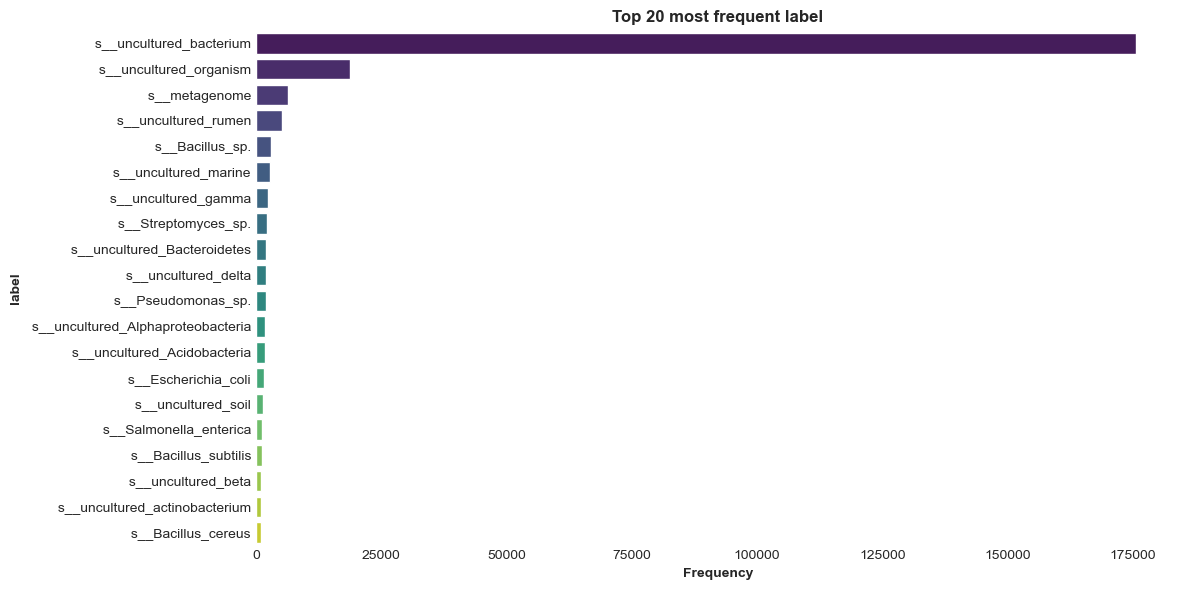

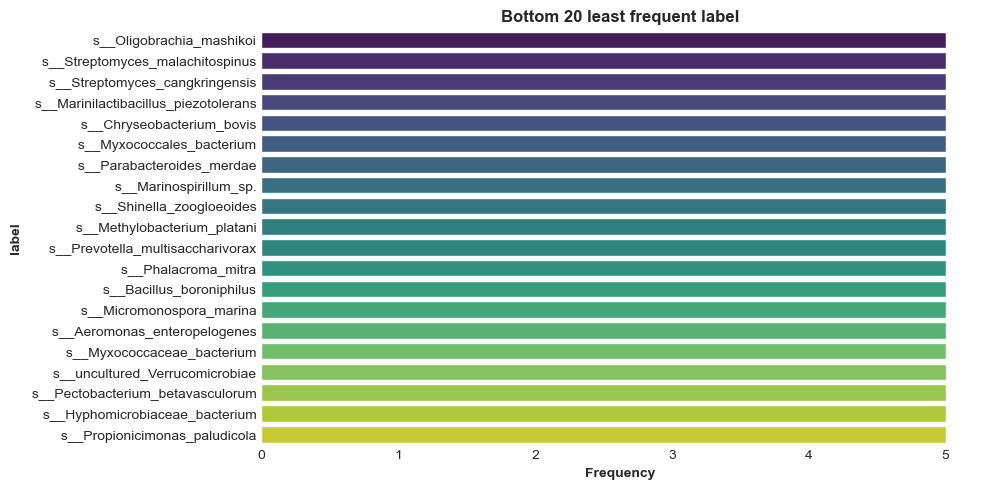

📊 Frequency plots saved to: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/species


🧹 FILTERING UNWANTED LABELS
   Keywords to filter: ['uncultured', 'uncultivated', 'metagenome', 'metagenomic', 'unidentified', 'unknown', 'unclassified', 'environmental', 'clone']
   Case sensitive: False

📊 BEFORE FILTERING:
   • Total samples: 339,661
   • Total classes: 4,037

✅ AFTER FILTERING:
   • Remaining samples: 89,093
   • Remaining classes: 3,369

📉 FILTERED OUT:
   • Samples removed: 250,568 (73.77%)
   • Classes removed: 668 (16.55%)

   📋 Breakdown by keyword:
      • 'uncultured': 242,504 samples
      • 'metagenome': 7,025 samples
      • 'unidentified': 1,024 samples
      • 'clone': 9 samples
      • 'uncultivated': 6 samples

🌳 APPLYING HIERARCHICAL GROUPING

🌳 HIERARCHICAL RARE CLASS GROUPING
   Threshold: 20 samples
   Strategy: group

   📊 RARE CLASSES IDENTIFIED:
      • Total rare classes: 2638
      • Total samples in rare classes: 22804

   ✅ GROUPING COMPLETED:
     

In [6]:
# ✅ BEST PRACTICE: Preserve ALL rare taxa
csv_paths, paths_file = run_extract_(
    df_tax,
    columns_select=['species'],
    output_path='/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset',
    
    kmer_size=6,

    # ✅ NEW: Clean ambiguous bases
    filter_ambiguous_bases=True,
    ambiguous_handling='replace',      # Most conservative, "remove", "replace", "random"
    max_ambiguous_ratio=0.01,         # Allow max 1% ambiguous

    # ✅ NEW: Filtering configuration (DEFAULT)
    filter_uncultured=True,      # Remove 'uncultured' labels
    filter_metagenome=True,       # Remove 'metagenome' labels
    filter_unidentified=True,     # Remove 'unknown', 'unidentified'
    filter_environmental=True,   # Keep 'environmental' labels

    # 🆕 Keep all classes initially
    min_sample_freq=5,           # ✅ NO initial filtering
    
    # Balancing strategy
    imbalance_strategy='hierarchical_grouping',
    hierarchical_grouping=True,   # Group rare by genus

    # Balancing Using Under Sampling
    sampling_strategy='centroid_closest', # None untuk ambil semua data "centroid_closest","centroid_kmeans", "stratified","balanced"
    sample_fraction=0.01, # jumlah baris yang diambil/disampel
    small_class_threshold=20,     # Group if <10 samples, ✅ Group rare classes
    small_class_strategy='group',
    min_samples_per_class=500, # ✅ Ensure minimum per class
    
    # 🆕 Keep only top 100 classes (AFTER balancing)
    top_n_classes=None,  # ← NEW! Integer 100, 50, 200, etc.

    # Visualization
    create_plots=True,
    plot_top_n=None
)

In [7]:
import pandas as pd

# Load your data
df = pd.read_csv("/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/species/species_sampled.csv")

# Check for ambiguous k-mers
ambiguous_bases = set('NRYKHDBVSWM')
ambiguous_kmers = []

for col in df.columns:
    if col.startswith('kmer_'):
        kmer = col.replace('kmer_', '')
        if any(base in ambiguous_bases for base in kmer):
            ambiguous_kmers.append(kmer)

print(f"🔍 Found {len(ambiguous_kmers)} ambiguous k-mers:")
print(f"   Examples: {ambiguous_kmers[:20]}")

# Calculate percentage
total_kmers = sum(1 for col in df.columns if col.startswith('kmer_'))
ambig_percentage = len(ambiguous_kmers) / total_kmers * 100
print(f"\n📊 Ambiguous k-mers: {ambig_percentage:.2f}% of total")

🔍 Found 0 ambiguous k-mers:
   Examples: []

📊 Ambiguous k-mers: 0.00% of total


In [8]:
cek_sample = pd.read_csv("/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/species/species_sampled.csv")
cek_sample

,sequence,label,kmer_AAAAAA,kmer_AAAAAC,kmer_AAAAAG,kmer_AAAAAT,kmer_AAAACA,kmer_AAAACC,kmer_AAAACG,kmer_AAAACT,...,kmer_TTTTCG,kmer_TTTTCT,kmer_TTTTGA,kmer_TTTTGC,kmer_TTTTGG,kmer_TTTTGT,kmer_TTTTTA,kmer_TTTTTC,kmer_TTTTTG,kmer_TTTTTT
0,TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...,s__Bordetella_pertussis,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
1,TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...,s__Bordetella_pertussis,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
2,TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...,s__Bordetella_pertussis,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
3,TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...,s__Bordetella_pertussis,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
4,TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...,s__Bordetella_pertussis,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56704,TCATGAATATTCCACAATGGCCGAAAGGCTGATGGAGCAATGCCGC...,s__Parcubacteria_group,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
56705,TCAAGAATATTCCTCAATGGACGAAAGTCTGAAGGAGCGACGCCGC...,s__Parcubacteria_group,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
56706,TCACGAATCTTCCTCAATGGCCGAAAGGCTGAAGGAGCGACGCCGC...,s__Parcubacteria_group,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
56707,TCGAGAATATTGGACAATGGGGGAAACCCTGATCCTGCGACGCCGC...,s__Parcubacteria_group,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


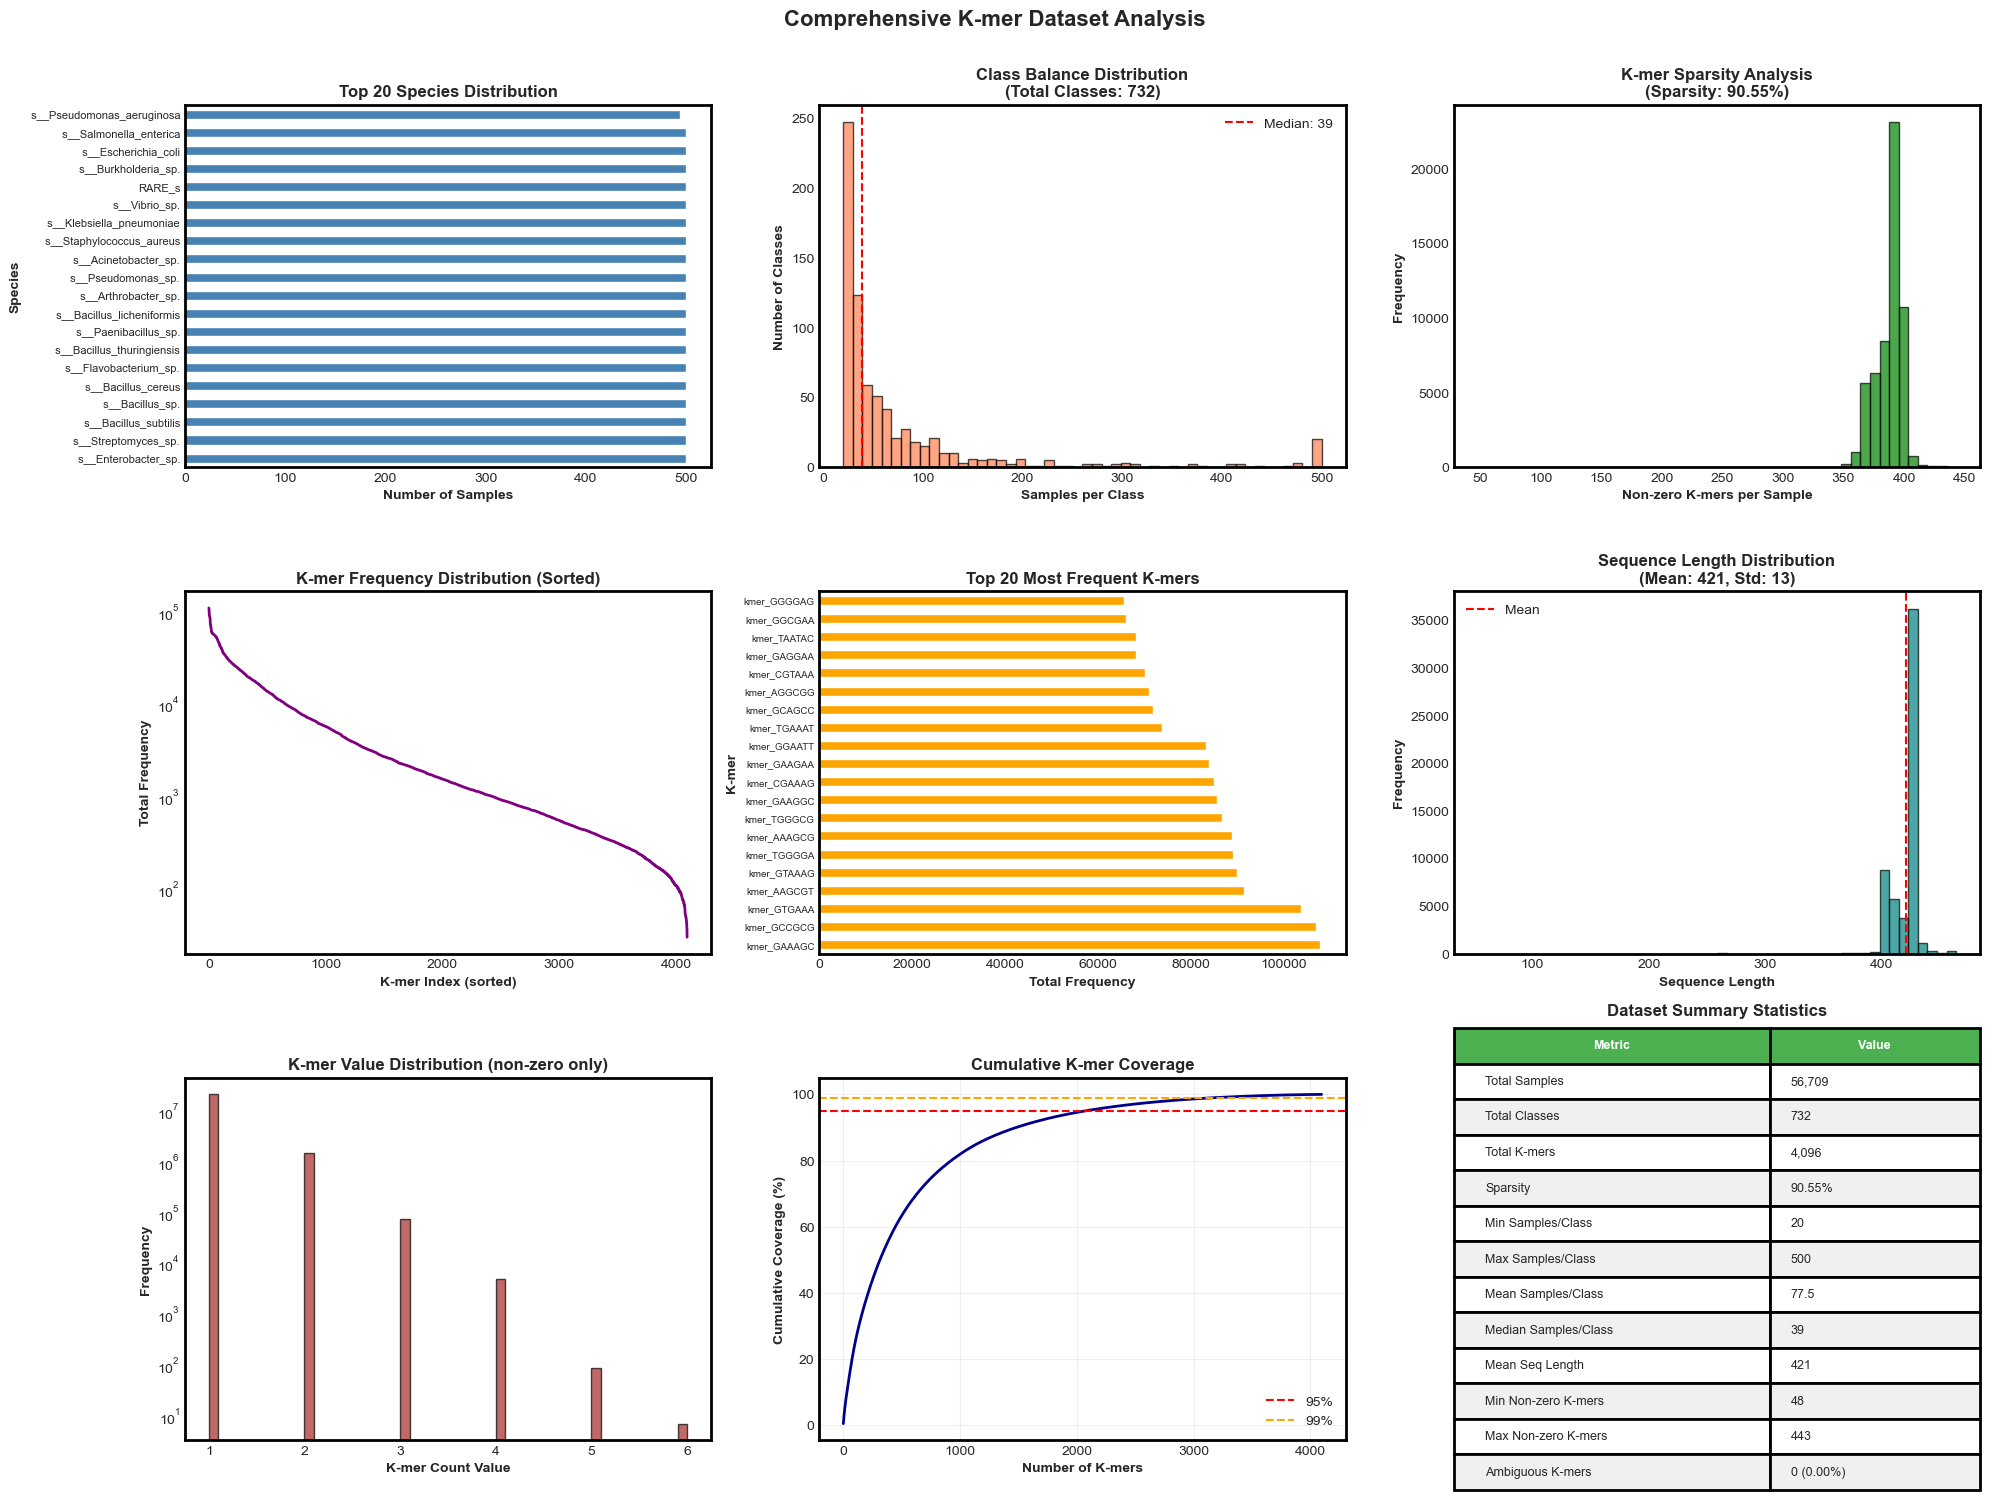


📊 ANALYSIS COMPLETE
✅ Generated 9 comprehensive plots covering:
   • Class distribution and balance
   • K-mer sparsity and frequency patterns
   • Sequence characteristics
   • Statistical summaries


In [14]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Set style
sns.set_style("white")
plt.rcParams['figure.figsize'] = (16, 12)

# Create comprehensive analysis plots
fig = plt.figure(figsize=(20, 15))

# 1. Class Distribution (Top 20)
ax1 = plt.subplot(3, 3, 1)
class_counts = cek_sample['label'].value_counts().head(20)
class_counts.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_xlabel('Number of Samples', fontsize=10, fontweight='bold')
ax1.set_ylabel('Species', fontsize=10, fontweight='bold')
ax1.set_title('Top 20 Species Distribution', fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelsize=8)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 2. Overall Class Distribution
ax2 = plt.subplot(3, 3, 2)
total_classes = cek_sample['label'].nunique()
samples_per_class = cek_sample['label'].value_counts()
ax2.hist(samples_per_class, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Samples per Class', fontsize=10, fontweight='bold')
ax2.set_ylabel('Number of Classes', fontsize=10, fontweight='bold')
ax2.set_title(f'Class Balance Distribution\n(Total Classes: {total_classes})', fontsize=12, fontweight='bold')
ax2.axvline(samples_per_class.median(), color='red', linestyle='--', label=f'Median: {samples_per_class.median():.0f}')
ax2.legend()
for spine in ax2.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 3. K-mer Sparsity
ax3 = plt.subplot(3, 3, 3)
kmer_cols = [col for col in cek_sample.columns if col.startswith('kmer_')]
sparsity = (cek_sample[kmer_cols] == 0).sum().sum() / (len(cek_sample) * len(kmer_cols)) * 100
non_zero_counts = (cek_sample[kmer_cols] != 0).sum(axis=1)
ax3.hist(non_zero_counts, bins=50, color='green', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Non-zero K-mers per Sample', fontsize=10, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax3.set_title(f'K-mer Sparsity Analysis\n(Sparsity: {sparsity:.2f}%)', fontsize=12, fontweight='bold')
for spine in ax3.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 4. K-mer Frequency Distribution
ax4 = plt.subplot(3, 3, 4)
kmer_totals = cek_sample[kmer_cols].sum(axis=0).sort_values(ascending=False)
ax4.plot(range(len(kmer_totals)), kmer_totals.values, color='purple', linewidth=2)
ax4.set_xlabel('K-mer Index (sorted)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Total Frequency', fontsize=10, fontweight='bold')
ax4.set_title('K-mer Frequency Distribution (Sorted)', fontsize=12, fontweight='bold')
ax4.set_yscale('log')
for spine in ax4.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 5. Top 20 Most Frequent K-mers
ax5 = plt.subplot(3, 3, 5)
top_kmers = kmer_totals.head(20)
top_kmers.plot(kind='barh', ax=ax5, color='orange')
ax5.set_xlabel('Total Frequency', fontsize=10, fontweight='bold')
ax5.set_ylabel('K-mer', fontsize=10, fontweight='bold')
ax5.set_title('Top 20 Most Frequent K-mers', fontsize=12, fontweight='bold')
ax5.tick_params(axis='y', labelsize=7)
for spine in ax5.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 6. Sequence Length Distribution
ax6 = plt.subplot(3, 3, 6)
seq_lengths = cek_sample['sequence'].str.len()
ax6.hist(seq_lengths, bins=50, color='teal', edgecolor='black', alpha=0.7)
ax6.set_xlabel('Sequence Length', fontsize=10, fontweight='bold')
ax6.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax6.set_title(f'Sequence Length Distribution\n(Mean: {seq_lengths.mean():.0f}, Std: {seq_lengths.std():.0f})', 
              fontsize=12, fontweight='bold')
ax6.axvline(seq_lengths.mean(), color='red', linestyle='--', label=f'Mean')
ax6.legend()
for spine in ax6.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 7. K-mer Value Distribution (log scale)
ax7 = plt.subplot(3, 3, 7)
all_kmer_values = cek_sample[kmer_cols].values.flatten()
all_kmer_values = all_kmer_values[all_kmer_values > 0]  # Only non-zero values
ax7.hist(all_kmer_values, bins=50, color='brown', edgecolor='black', alpha=0.7)
ax7.set_xlabel('K-mer Count Value', fontsize=10, fontweight='bold')
ax7.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax7.set_title('K-mer Value Distribution (non-zero only)', fontsize=12, fontweight='bold')
ax7.set_yscale('log')
for spine in ax7.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 8. Cumulative K-mer Coverage
ax8 = plt.subplot(3, 3, 8)
cumsum_kmers = kmer_totals.cumsum() / kmer_totals.sum() * 100
ax8.plot(range(len(cumsum_kmers)), cumsum_kmers.values, color='darkblue', linewidth=2)
ax8.set_xlabel('Number of K-mers', fontsize=10, fontweight='bold')
ax8.set_ylabel('Cumulative Coverage (%)', fontsize=10, fontweight='bold')
ax8.set_title('Cumulative K-mer Coverage', fontsize=12, fontweight='bold')
ax8.axhline(95, color='red', linestyle='--', label='95%')
ax8.axhline(99, color='orange', linestyle='--', label='99%')
ax8.legend()
ax8.grid(True, alpha=0.3)
for spine in ax8.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# 9. Summary Statistics Table
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
ax9.set_facecolor('white')
summary_stats = [
    ['Total Samples', f'{len(cek_sample):,}'],
    ['Total Classes', f'{total_classes:,}'],
    ['Total K-mers', f'{len(kmer_cols):,}'],
    ['Sparsity', f'{sparsity:.2f}%'],
    ['Min Samples/Class', f'{samples_per_class.min():,}'],
    ['Max Samples/Class', f'{samples_per_class.max():,}'],
    ['Mean Samples/Class', f'{samples_per_class.mean():.1f}'],
    ['Median Samples/Class', f'{samples_per_class.median():.0f}'],
    ['Mean Seq Length', f'{seq_lengths.mean():.0f}'],
    ['Min Non-zero K-mers', f'{non_zero_counts.min():,}'],
    ['Max Non-zero K-mers', f'{non_zero_counts.max():,}'],
    ['Ambiguous K-mers', f'{len(ambiguous_kmers)} ({ambig_percentage:.2f}%)'],
]

table = ax9.table(cellText=summary_stats, 
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style the table
for i in range(len(summary_stats) + 1):
    if i == 0:
        table[(i, 0)].set_facecolor('#4CAF50')
        table[(i, 1)].set_facecolor('#4CAF50')
        table[(i, 0)].set_text_props(weight='bold', color='white')
        table[(i, 1)].set_text_props(weight='bold', color='white')
    else:
        table[(i, 0)].set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')
        table[(i, 1)].set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')

# Add border to table
for key, cell in table.get_celld().items():
    cell.set_linewidth(2)
    cell.set_edgecolor('black')

ax9.set_title('Dataset Summary Statistics', fontsize=12, fontweight='bold', pad=40, y=1.02)

plt.suptitle('Comprehensive K-mer Dataset Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

print("\n" + "="*80)
print("📊 ANALYSIS COMPLETE")
print("="*80)
print(f"✅ Generated 9 comprehensive plots covering:")
print("   • Class distribution and balance")
print("   • K-mer sparsity and frequency patterns")
print("   • Sequence characteristics")
print("   • Statistical summaries")
print("="*80)

📊 Preparing PCA visualization...
   • Total samples: 56,709
   • Total features: 4,096
   • Total classes: 732

🔄 Computing PCA (2 components)...
✅ PCA completed!
   • Explained variance (PC1): 0.1595 (15.95%)
   • Explained variance (PC2): 0.0729 (7.29%)
   • Total explained variance: 0.2324 (23.24%)


KeyboardInterrupt: 

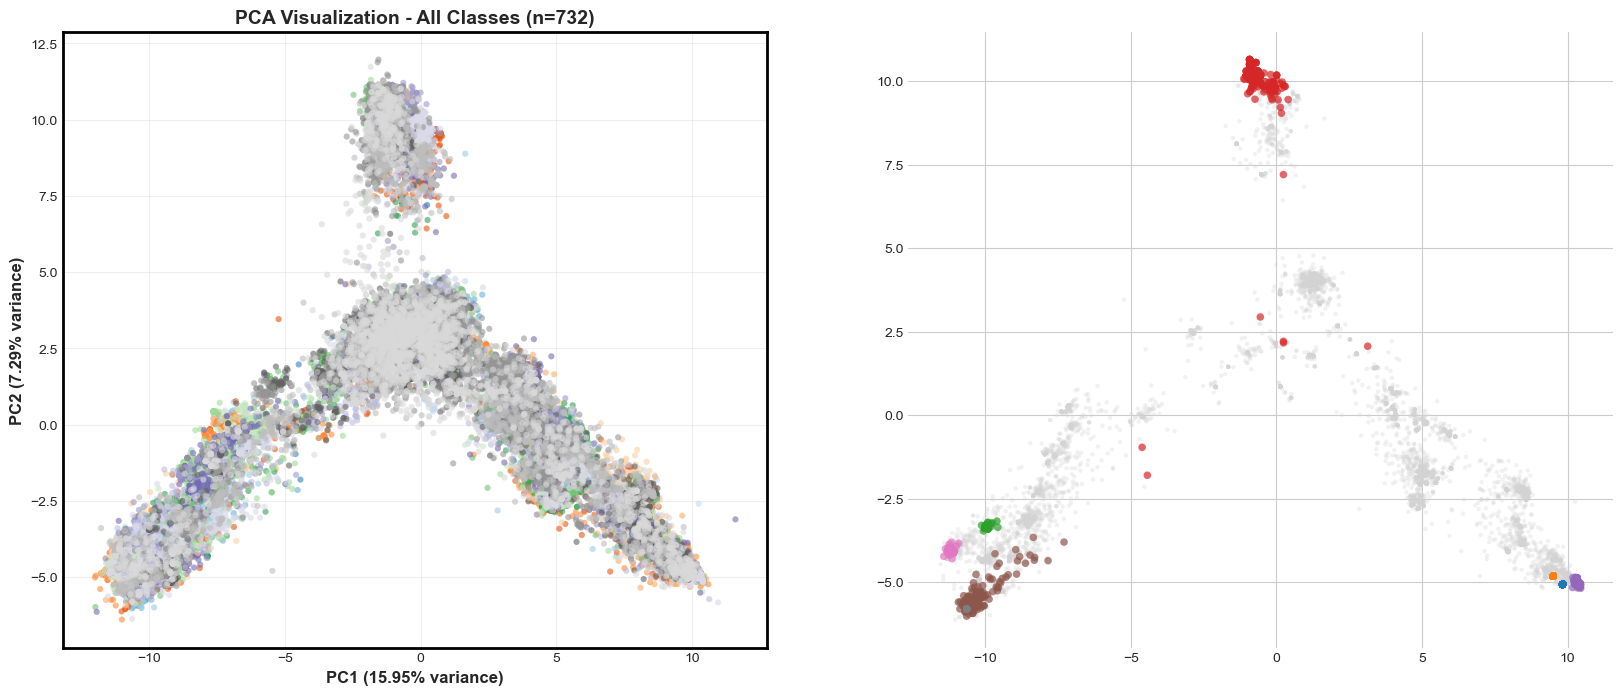

In [15]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from collections import Counter

import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Extract features and labels
kmer_cols = [col for col in cek_sample.columns if col.startswith('kmer_')]
X = cek_sample[kmer_cols].values
y = cek_sample['label'].values

# Get unique labels and their counts
unique_labels = np.unique(y)
n_classes = len(unique_labels)

print(f"📊 Preparing PCA visualization...")
print(f"   • Total samples: {X.shape[0]:,}")
print(f"   • Total features: {X.shape[1]:,}")
print(f"   • Total classes: {n_classes}")

# Perform PCA
print(f"\n🔄 Computing PCA (2 components)...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print(f"✅ PCA completed!")
print(f"   • Explained variance (PC1): {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"   • Explained variance (PC2): {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   • Total explained variance: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Create visualization with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: PCA scatter plot (all classes)
ax1 = axes[0]
scatter = ax1.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=np.arange(len(y)), 
                     cmap='tab20c', 
                     alpha=0.6, 
                     s=20,
                     edgecolors='none')

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax1.set_title(f'PCA Visualization - All Classes (n={n_classes})', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add border
for spine in ax1.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

# Plot 2: PCA with top 10 classes highlighted
ax2 = axes[1]

# Get top 10 most frequent classes
class_counts = Counter(y)
top_10_classes = [cls for cls, _ in class_counts.most_common(10)]

# Create color map
colors = plt.cm.tab10(np.linspace(0, 1, 10))
color_dict = {cls: colors[i] for i, cls in enumerate(top_10_classes)}

# Plot: gray for others, colored for top 10
for i, label in enumerate(y):
    if label in top_10_classes:
        color = color_dict[label]
        alpha = 0.7
        s = 30
        zorder = 2
    else:
        color = 'lightgray'
        alpha = 0.3
        s = 10
        zorder = 1
    
    ax2.scatter(X_pca[i, 0], X_pca[i, 1], 
               c=[color], alpha=alpha, s=s, 
               edgecolors='none', zorder=zorder)

# Add legend for top 10 classes
legend_elements = [plt.scatter([], [], c=[color_dict[cls]], 
                              s=50, label=f'{cls} (n={class_counts[cls]})', 
                              alpha=0.7)
                  for cls in top_10_classes]
ax2.legend(handles=legend_elements, 
          loc='upper right', 
          fontsize=8,
          framealpha=0.9,
          title='Top 10 Classes',
          title_fontsize=10)

ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
ax2.set_title('PCA Visualization - Top 10 Classes Highlighted', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add border
for spine in ax2.spines.values():
    spine.set_linewidth(2)
    spine.set_edgecolor('black')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*80)
print("📊 PCA SUMMARY")
print("="*80)
print(f"PC1 range: [{X_pca[:, 0].min():.2f}, {X_pca[:, 0].max():.2f}]")
print(f"PC2 range: [{X_pca[:, 1].min():.2f}, {X_pca[:, 1].max():.2f}]")
print(f"\n🏆 Top 10 Most Frequent Classes:")
for i, (cls, count) in enumerate(class_counts.most_common(10), 1):
    print(f"   {i:2d}. {cls:35s} - {count:4d} samples")
print("="*80)

# **`5. Ekstract Level Taksonomi`**


🔬 Processing level: SPECIES
= STEP 1: Load Data species =
SUMMARY species
== Hitung frekuensi kelas & drop label < 4
CSV saved to: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/dataset/species/species.csv


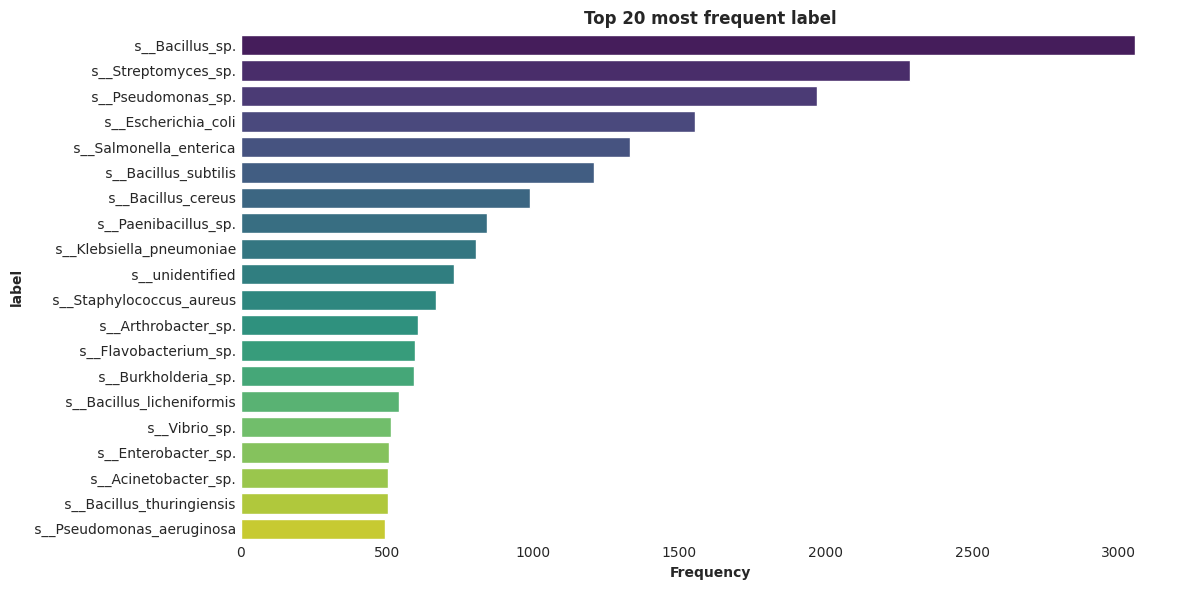

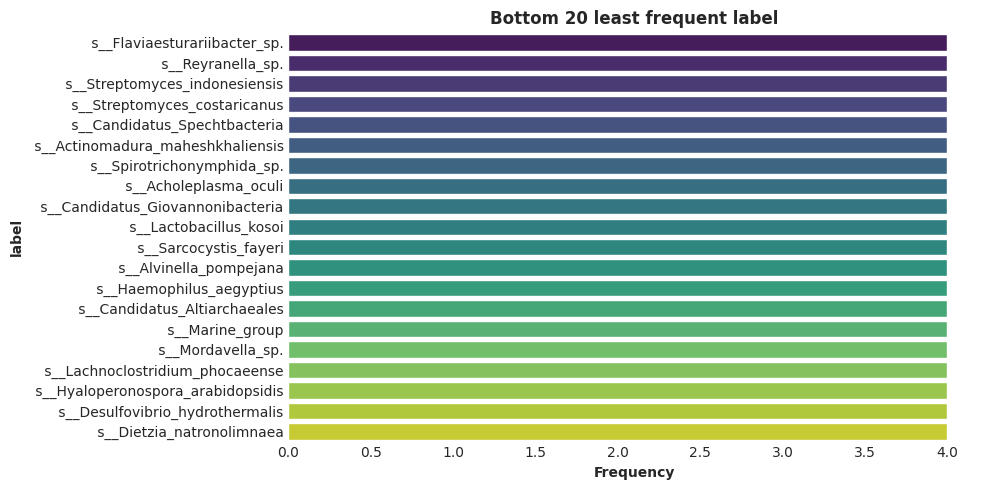

=== Jumlah label sebelum filter: 27139
=== Jumlah label setelah filter: 4658
=== Jumlah baris data: 97739

📊 Applying sampling strategy: centroid_kmeans

🧬 CENTROID-BASED SAMPLING (ENHANCED)
   Method: kmeans
   K-mer size: 6
   Sample fraction: 50
   Min samples per class: 10
   Small class threshold: 10
   Small class strategy: group

📊 CLASS DISTRIBUTION:
   Total classes: 4658
   Large classes (>10 samples): 1517
   Small classes (≤10 samples): 3141
   Total samples in small classes: 18319

🔷 Grouping 3141 small classes into 'RARE_CLASS'
   ✅ Keeping all 18319 rare samples

🔬 Processing 1517 large classes...
   📊 K-mer feature space: 4096 dimensions

   [1/1517] Class:  s__Bacillus_sp.
      Original: 3058 → Target: 3058 samples
      ✅ Sampled from 5 clusters

   [2/1517] Class:  s__Streptomyces_sp.
      Original: 2287 → Target: 2287 samples
      ✅ Sampled from 5 clusters

   [3/1517] Class:  s__Pseudomonas_sp.
      Original: 1971 → Target: 1971 samples
      ✅ Sampled from 5 c

In [13]:
# Example 1: Group small classes (RECOMMENDED)
csv_paths, paths_file = run_extract_(
    df_tax,
    columns_select=['species'],
    output_path=folders['dataset'],
    generate_dummy=True,
    sampling_strategy='centroid_kmeans',
    sample_fraction=50,
    min_samples_per_class=10,
    small_class_threshold=10,
    small_class_strategy='group',  # 🎯 Group rare classes
    kmer_size=6
)

# # Option A: Closest to centroid (most representative)
# sampling_strategy='centroid_closest'

# # Option B: Diverse (60% closest + 40% farthest)
# sampling_strategy='centroid_diverse'

# # Option C: K-means clustering
# sampling_strategy='centroid_kmeans'

# sampling_strategy='stratified',
# sample_fraction=0.1  # 10% random dari tiap class

# sampling_strategy='balanced',
# sample_per_label=50  # Exactly 50 samples per class

In [17]:
import os
import pandas as pd

# ============================================================
# STEP 1: Define paths
# ============================================================
csv_level_file_path = "/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/csv_level_paths_list.txt"

# ============================================================
# STEP 2: Check if file exists
# ============================================================
print("🔍 Checking paths file...")
if not os.path.exists(csv_level_file_path):
    print(f"❌ File NOT found: {csv_level_file_path}")
    print(f"🔄 Generating new paths file...")
    
    # Regenerate paths file
    dataset_folder = os.path.dirname(csv_level_file_path)
    csv_files = []
    
    for root, dirs, files in os.walk(dataset_folder):
        for file in files:
            if file.endswith('.csv') and 'paths_list' not in file:
                full_path = os.path.join(root, file)
                csv_files.append(full_path)
    
    with open(csv_level_file_path, 'w') as f:
        for path in csv_files:
            f.write(path + '\n')
    
    print(f"✅ Generated paths file with {len(csv_files)} entries")

# ============================================================
# STEP 3: Load data
# ============================================================
def load_all_csv_data_safe(paths_file):
    """Safe version of load_all_csv_data with error handling"""
    
    data_dict = {}
    
    # Read paths
    with open(paths_file, 'r') as f:
        paths = [line.strip() for line in f.readlines() if line.strip()]
    
    print(f"\n📂 Loading data from {len(paths)} files...")
    
    for path in paths:
        # Extract level name
        level = os.path.basename(os.path.dirname(path))
        
        # Handle edge case: if file is directly in dataset folder
        if level == 'dataset':
            filename = os.path.basename(path)
            level = filename.replace('_sampled.csv', '').replace('.csv', '')
        
        print(f"   Loading {level}...")
        
        try:
            if os.path.exists(path):
                df = pd.read_csv(path)
                data_dict[level] = df
                print(f"      ✅ Loaded {len(df):,} rows, {df.shape[1]} columns")
            else:
                print(f"      ❌ File not found: {path}")
        except Exception as e:
            print(f"      ❌ Error loading {path}: {e}")
    
    print(f"\n✅ Successfully loaded {len(data_dict)} datasets")
    return data_dict

# Load data
all_level_data = load_all_csv_data_safe(csv_level_file_path)

# ============================================================
# STEP 4: Verify loaded data
# ============================================================
print("\n📊 LOADED DATASETS SUMMARY:")
print("="*60)
for level, df in all_level_data.items():
    print(f"📁 {level:15s} | Rows: {len(df):,} | Cols: {df.shape[1]}")
    if 'label' in df.columns:
        n_classes = df['label'].nunique()
        print(f"   └─ Classes: {n_classes}")

# Display first dataset
if len(all_level_data) > 0:
    first_level = list(all_level_data.keys())[0]
    print(f"\n📋 Sample from '{first_level}':")
    print(all_level_data[first_level].head())

🔍 Checking paths file...

📂 Loading data from 1 files...
   Loading species...
      ✅ Loaded 56,709 rows, 4098 columns

✅ Successfully loaded 1 datasets

📊 LOADED DATASETS SUMMARY:
📁 species         | Rows: 56,709 | Cols: 4098
   └─ Classes: 732

📋 Sample from 'species':
                                            sequence  \
0  TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...   
1  TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...   
2  TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...   
3  TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...   
4  TGGGGAATTTTGGACAATGGGGGCAACCCTGATCCAGCCATCCCGC...   

                      label  kmer_AAAAAA  kmer_AAAAAC  kmer_AAAAAG  \
0   s__Bordetella_pertussis            0            0            0   
1   s__Bordetella_pertussis            0            0            0   
2   s__Bordetella_pertussis            0            0            0   
3   s__Bordetella_pertussis            0            0            0   
4   s__Bordetella_pertussis            0

# **`6. Split & Ekstraksi Fitur`**

In [ ]:
taxonomy_paths_txt = "/Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/csv_level_paths_list.txt"  # Your txt file with paths
output_base_path = "/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep"  # Base path for output

# Run the complete process with monitoring
print("🔧 Initializing vectorization pipeline...")

vectorization_paths, summary, all_paths = main_vectorization_process(
    taxonomy_paths_txt=taxonomy_paths_txt,
    output_base_path=output_base_path,
    k_values='auto', #[4,6,8] # Use 'auto' for automatic selection
    test_size=0.2,      # 15% for testing
    random_state=42,     # For reproducibility
    save_sparse=True,  # ✅ Generate .npz files ✅ ENABLE sparse format
    save_dense=True,    # ✅ Generate .npy files ✅ Keep dense too
    skip_existing=False # ✅ FORCE regenerate
)


🔧 Initializing vectorization pipeline...

🚀 STARTING VECTORIZATION PIPELINE

📂 Found 1 CSV files to process

📊 PROCESSING FILE 1/1
📁 Input: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/dataset/species/species_sampled.csv

   ✅ Loaded: 56,709 rows × 4098 columns

   🔍 Detected 4,096 k-mer columns
   🎯 AUTO-DETECTED k-mer size: 6
      Sample column: kmer_AAAAAA
      K-mer sequence: AAAAAA

   ──────────────────────────────────────────────────────────────────────
   🧬 Processing k=6
   ──────────────────────────────────────────────────────────────────────
   📊 K-mer column validation:
      • Valid k=6 columns: 4,096
      • Invalid/ambiguous: 0

   📦 Dataset preparation:
      • Features shape: (56709, 4096)
      • Labels shape: (56709,)
      • Unique classes: 732

   ✂️  Splitting data (test_size=0.2)...
      • Train: 45,367 samples
      • Test:  11,342 samples

   🏷️  Encoding labels...
      • Classes encoded: 732
      • Sample classes: [' s__Acetobacter_pasteurianus' ' s__Ac

# **`6. Reduksi Fitur`**

In [4]:
# Test path construction
data_path = '/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization'
level = 'species'

# Test with string input
kmers_str = ["k6"]
for k in kmers_str:
    print(f"\n📊 INPUT: k = '{k}' (type: {type(k).__name__})")
    
    # Wrong way (causes double k)
    path_wrong = f"{data_path}/{level}/k{k}/X_train_sparse_k{k}_{level}.npz"
    print(f"❌ WRONG: {path_wrong}")
    
    # Right way (normalize first)
    if isinstance(k, str):
        k_normalized = k
        k_int = int(k.replace('k', ''))
    else:
        k_int = k
        k_normalized = f"k{k}"
    
    path_right = f"{data_path}/{level}/{k_normalized}/X_train_sparse_{k_normalized}_{level}.npz"
    print(f"✅ RIGHT: {path_right}")

print("\n" + "="*80)

# Test with integer input
kmers_int = [6]
for k in kmers_int:
    print(f"\n📊 INPUT: k = {k} (type: {type(k).__name__})")
    
    # This works correctly
    path_correct = f"{data_path}/{level}/k{k}/X_train_sparse_k{k}_{level}.npz"
    print(f"✅ CORRECT: {path_correct}")


📊 INPUT: k = 'k6' (type: str)
❌ WRONG: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/kk6/X_train_sparse_kk6_species.npz
✅ RIGHT: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/X_train_sparse_k6_species.npz


📊 INPUT: k = 6 (type: int)
✅ CORRECT: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/X_train_sparse_k6_species.npz


In [2]:
results = run_benchmark(
        data_path='/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization',
        output_dir='/Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction',
        levels=['species'],
        kmers=[6],                           
        methods=['ipca'],
        max_memory_gb=8.0,
        cev_threshold=0.20,           # 👈 Target 95%
        start_components=1,                           
        step_components=2,           # 👈 Nambah 50 setiap iterasi
        max_components=5000,          # 👈 Maksimal 1000 komponen
        create_plots=True,
    
        # 🎲 Enable sampling
        enable_sampling=False,
        sampling_kmer_threshold=8,  # Sample only k>=8
        sampling_percentage=0.005,     # 50% per class
        min_samples_per_class=2,     # Skip classes with <2 samples, if we add 0 therefore all class will be process
        max_samples_per_class=5000,  # Optional: max limit
    ) 


🚀 Starting Memory-Safe Benchmark with Stratified Sampling
⚙️  Max memory per operation: 8.0GB
🧠 Initial Memory: 0.47GB used, 3.35GB available (61.0%)

🧬 SPECIES - K-mer 6
🧠 Before loading species k6 Memory: 0.47GB used, 3.35GB available (61.0%)
📂 Loading species k6 (train)...
   🔍 Looking for:
      X: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/X_train_sparse_k6_species.npz
      y: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/y_train_k6_species.csv
   ✅ Files validated
   📥 Loading sparse matrix...
      ✅ Loaded sparse matrix: (45367, 4096)
      📊 Sparsity: 90.55%
   📥 Loading labels...
      ✅ Loaded labels: 45367 samples
      📊 Unique classes: 732
   ✅ Data loaded successfully
   💾 Sparse size: 0.14GB
   ⚠️  Dense would be: 1.49GB
🧠 After loading species k6 Memory: 0.70GB used, 3.35GB available (61.0%)
🧠 Before loading species k6 Memory: 0.70GB used, 3.35GB available (61.0%)
📂 Loading species k6 (test)...
   🔍 Look

   Transforming data for metrics...

   ✅ CEV: 0.1594 (15.94%)

   🔬 Computing comprehensive metrics for n=1...
      1️⃣  Computing MSE...
         ✅ MSE: 0.057528
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.4879
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 0.86
      4️⃣  Time: 180.50s | Memory: 6311.39 MB

──────────────────────────────────────────────────────────────────────
   Testing n_components = 3
──────────────────────────────────────────────────────────────────────


   Transforming data for metrics...

   ✅ CEV: 0.2910 (29.10%)

   🔬 Computing comprehensive metrics for n=3...
      1️⃣  Computing MSE...
         ✅ MSE: 0.048072
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.5883
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 2.34
      4️⃣  Time: 138.44s | Memory: 6311.33 MB

   ✅ Threshold reached at component 2
      Final CEV: 0.2324

🔧 FINAL FIT with 2 components + COMPREHENSIVE METRICS


Final fitting: 100%|██████████| 1/1 [02:15<00:00, 135.84s/it]


   🔄 Transforming for final metrics...

   📊 Recording final metrics for n=2...

   🔬 Computing comprehensive metrics for n=2...
      1️⃣  Computing MSE...
         ✅ MSE: 0.052063
      2️⃣  Computing distance correlation...
         ✅ Correlation: 0.5493
      3️⃣  Estimating intrinsic dimensionality...
         ✅ Intrinsic dim: 1.69
      4️⃣  Time: 137.10s | Memory: 6311.33 MB

📊 GENERATING COMPREHENSIVE ANALYSIS PLOTS

   📊 Generating comprehensive analysis plots...
      ✅ MSE plot: analysis_reconstruction_error_species_k6_ipca.png
      ✅ Distance correlation plot: analysis_distance_correlation_species_k6_ipca.png

📊 Creating intrinsic dimensionality analysis plots...
   ✅ Valid data points: 3
      Components range: 1 - 3
      Intrinsic dim range: 0.86 - 2.34
Data statistik berhasil disimpan ke 'analysis_intrinsic_dimensionality_species_k6_ipca_summary.csv'
      ✅ Intrinsic dim plot (Nature style): analysis_intrinsic_dimensionality_species_k6_ipca.png
      ✅ Time execution 


🔄 Step 3: Transforming TEST data...
   🔄 Transforming data with IncrementalPCA (NO FITTING)...



💾 Step 4: Saving results...
🧠 Before saving results Memory: 0.51GB used, 3.56GB available (58.5%)
💾 Saving train data in chunks...
💾 Saved train data: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
🧠 After saving results Memory: 0.52GB used, 3.32GB available (61.4%)
🧠 Before saving results Memory: 0.52GB used, 3.32GB available (61.4%)
💾 Saving test data in chunks...
💾 Saved test data: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
🧠 After saving results Memory: 0.52GB used, 3.29GB available (61.7%)

📊 Step 5: Creating enhanced plots...
   📊 Plotting 5000 samples with 695 classes...
   ✅ PCA feature space plot saved: pca_feature_space_all_labels_train.png
   📊 Plotting 5000 samples with 710 classes...
   ✅ PCA feature space plot saved: pca_feature_space_all_labels_test.png
⚠️  Too many classes (559) for heatmap, skipping...

✅ SUCCESS: ipca completed!
   📊 Train CEV Score: 0.2324
   🧠 P

In [ ]:
results = run_benchmark(
        data_path='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization',
        output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction',
        levels=['species'],
        kmers=[8],                           
        methods=['ipca'],
        max_memory_gb=10.0,
        cev_threshold=0.95,           # 👈 Target 95%
        start_components=1000,                           
        step_components=500,           # 👈 Nambah 50 setiap iterasi
        max_components=5000,          # 👈 Maksimal 1000 komponen
        create_plots=True,
        max_iterations=None,
    
        # 🎲 Enable sampling
        enable_sampling=False,
        sampling_kmer_threshold=8,  # Sample only k>=8
        sampling_percentage=0.50,     # 50% per class
        min_samples_per_class=2,     # Skip classes with <2 samples, if we add 0 therefore all class will be process
        max_samples_per_class=5000,  # Optional: max limit
    ) 

🚀 Starting Memory-Safe Benchmark with Stratified Sampling
⚙️  Max memory per operation: 10.0GB
🧠 Initial Memory: 0.31GB used, 8.86GB available (28.6%)

🧬 SPECIES - K-mer 8
🧠 Before loading species k8 Memory: 0.31GB used, 8.86GB available (28.6%)
📊 Data shape: (54585, 79725)
💾 Sparse size: 0.18GB
⚠️  Dense would be: 34.81GB
⚠️  WARNING: Data too large for single batch!
   Will use incremental processing
🧠 After loading species k8 Memory: 0.58GB used, 8.57GB available (30.9%)
🧠 Before loading species k8 Memory: 0.58GB used, 8.57GB available (30.9%)
📊 Data shape: (13647, 79725)
💾 Sparse size: 0.04GB
⚠️  Dense would be: 8.70GB
🧠 After loading species k8 Memory: 0.62GB used, 8.53GB available (31.3%)
✅ Train data loaded: (54585, 79725)
✅ Test data loaded: (13647, 79725)
   ℹ️  No sampling (k-mer 8 < threshold 8)
   ℹ️  No sampling (k-mer 8 < threshold 8)

🔧 Method: IPCA

📊 Step 1: Finding optimal components on TRAIN data...
🧠 Before component optimization Memory: 0.62GB used, 8.53GB availabl

Fitting 500 components:  25%|██▌       | 1/4 [2:36:53<7:50:40, 9413.35s/it]

# **`7. Training & Short Analysis K4 & K6`**

In [12]:
# Delete corrupted models
import os
import shutil

model_dir = "/Users/tirtasetiawan/Documents/rki_v1/rki_2025/model/species_k6_ipca_cpu"
if os.path.exists(model_dir):
    print(f"🗑️  Deleting old models: {model_dir}")
    shutil.rmtree(model_dir)
    print("✅ Cleared - will retrain from scratch")

🗑️  Deleting old models: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model/species_k6_ipca_cpu
✅ Cleared - will retrain from scratch


In [13]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# CONFIGURATION & SETUP
# ============================================================

print("="*80)
print("🔧 TRAINING PIPELINE - MULTI-KMER CONFIGURATION")
print("="*80)

# ✅ FIX 1: Better configuration structure
CONFIG = {
    'base_path': '/Users/tirtasetiawan/Documents/rki_v1/rki_2025',
    'levels': ['species'],
    'kmers': ['k6'],
    'method': 'ipca',
    'device': 'cpu',
    'use_partial_fit': False,  # Enable partial fit
    'models': [['KNN', 'NaiveBayes']],  # ✅ IMPROVED: Added RandomForest
    'training_params': {
        'use_partial_fit': False,
        'batch_size': 1000,
        'create_plots': True,
        'enable_tuning': True,
        'optimization': 'bayesian',  # 'bayesian' or 'grid'
        'cv_folds': 3,
        'n_iter': 30,
        'auto_skip_conflict': False,
        # 'random_state': 42,
        # 'verbose': 1,
    }
}

# ============================================================
# HELPER FUNCTIONS
# ============================================================

def validate_paths(level, kmer, method, base_path):
    """✅ FIX 2: Validate all required files exist before training"""
    
    required_files = {
        'X_train': f"{base_path}/reduction/{level}/{kmer}/{method}/features_fold0_train.csv",
        'X_test': f"{base_path}/reduction/{level}/{kmer}/{method}/features_fold0_test.csv",
        'y_train': f"{base_path}/prep/vectorization/{level}/{kmer}/y_train_{kmer}_{level}.csv",
        'y_test': f"{base_path}/prep/vectorization/{level}/{kmer}/y_test_{kmer}_{level}.csv",
        'encoder': f"{base_path}/prep/vectorization/{level}/{kmer}/label_encoder_{kmer}_{level}.pkl",
    }
    
    missing_files = []
    for file_type, file_path in required_files.items():
        if not os.path.exists(file_path):
            missing_files.append(f"❌ {file_type}: {file_path}")
    
    if missing_files:
        print(f"\n🚨 MISSING FILES for {level}_{kmer}_{method}:")
        for msg in missing_files:
            print(f"   {msg}")
        return False, required_files
    
    return True, required_files


def load_data_safe(required_files):
    """✅ FIX 3: Safe data loading with detailed error messages"""
    
    try:
        print("\n   📂 Loading training data...")
        X_train_path = required_files['X_train']
        df_X_train = pd.read_csv(X_train_path)
        print(f"      ✅ X_train: {df_X_train.shape}")
        
        print("   📂 Loading test data...")
        X_test_path = required_files['X_test']
        df_X_test = pd.read_csv(X_test_path)
        print(f"      ✅ X_test: {df_X_test.shape}")
        
        print("   📂 Loading y_train labels...")
        y_train_path = required_files['y_train']
        df_y_train = pd.read_csv(y_train_path)
        y_train = df_y_train.iloc[:, 0].values  # Get first column
        print(f"      ✅ y_train: {len(y_train)} samples, {len(np.unique(y_train))} classes")
        
        print("   📂 Loading y_test labels...")
        y_test_path = required_files['y_test']
        df_y_test = pd.read_csv(y_test_path)
        y_test = df_y_test.iloc[:, 0].values
        print(f"      ✅ y_test: {len(y_test)} samples, {len(np.unique(y_test))} classes")
        
        print("   📂 Loading label encoder...")
        encoder_path = required_files['encoder']
        import joblib
        label_encoder = joblib.load(encoder_path)
        print(f"      ✅ Encoder: {len(label_encoder.classes_)} classes")
        
        # ✅ FIX 4: Extract features (remove label column if exists)
        if 'label' in df_X_train.columns:
            X_train = df_X_train.drop(columns=['label']).values
        else:
            X_train = df_X_train.values
            
        if 'label' in df_X_test.columns:
            X_test = df_X_test.drop(columns=['label']).values
        else:
            X_test = df_X_test.values
        
        # ✅ FIX 5: Data consistency check
        print("\n   🔍 Data consistency check:")
        if X_train.shape[0] != len(y_train):
            raise ValueError(f"Mismatch: X_train ({X_train.shape[0]}) != y_train ({len(y_train)})")
        if X_test.shape[0] != len(y_test):
            raise ValueError(f"Mismatch: X_test ({X_test.shape[0]}) != y_test ({len(y_test)})")
        print(f"      ✅ X_train matches y_train")
        print(f"      ✅ X_test matches y_test")
        
        # ✅ FIX 6: Check for class imbalance
        unique_train, counts_train = np.unique(y_train, return_counts=True)
        print(f"\n   📊 Train set class distribution:")
        for cls, cnt in zip(unique_train[:5], counts_train[:5]):
            print(f"      Class {cls}: {cnt} samples")
        if len(unique_train) > 5:
            print(f"      ... and {len(unique_train)-5} more classes")
        
        return {
            'X_train': X_train,
            'X_test': X_test,
            'y_train': y_train,
            'y_test': y_test,
            'label_encoder': label_encoder,
            'dataset_info': {
                'n_features': X_train.shape[1],
                'n_classes': len(np.unique(y_train)),
                'n_train': X_train.shape[0],
                'n_test': X_test.shape[0],
            }
        }
        
    except Exception as e:
        print(f"      ❌ Error loading data: {e}")
        import traceback
        traceback.print_exc()
        return None


def create_output_dir(base_path, level, kmer, method, device):
    """✅ FIX 7: Ensure output directory exists"""
    
    output_path = Path(f"{base_path}/model/{level}_{kmer}_{method}_{device}")
    output_path.mkdir(parents=True, exist_ok=True)
    return str(output_path)


# ============================================================
# MAIN TRAINING LOOP
# ============================================================

print("\n" + "="*80)
print("📊 STARTING TRAINING PIPELINE")
print("="*80)

# ✅ FIX 8: Improved loop structure with better error handling
training_results = []
failed_configs = []

for level in CONFIG['levels']:
    for kmer in CONFIG['kmers']:
        for method in [CONFIG['method']]:
            for device in [CONFIG['device']]:
                for models_list in CONFIG['models']:
                    
                    config_name = f"{level}_{kmer}_{method}_{device}"
                    print(f"\n{'='*80}")
                    print(f"🔄 TRAINING CONFIG: {config_name}")
                    print(f"   Models: {', '.join(models_list)}")
                    print(f"{'='*80}")
                    
                    # ✅ STEP 1: Validate paths
                    print(f"\n1️⃣  VALIDATING PATHS...")
                    is_valid, required_files = validate_paths(level, kmer, method, CONFIG['base_path'])
                    
                    if not is_valid:
                        print(f"   ❌ Validation failed - skipping this configuration")
                        failed_configs.append({
                            'config': config_name,
                            'reason': 'Missing files'
                        })
                        continue
                    
                    print(f"   ✅ All paths valid")
                    
                    # ✅ STEP 2: Load data
                    print(f"\n2️⃣  LOADING DATA...")
                    data = load_data_safe(required_files)
                    
                    if data is None:
                        print(f"   ❌ Data loading failed - skipping this configuration")
                        failed_configs.append({
                            'config': config_name,
                            'reason': 'Data loading error'
                        })
                        continue
                    
                    # ✅ STEP 3: Create output directory
                    print(f"\n3️⃣  CREATING OUTPUT DIRECTORY...")
                    output_dir = create_output_dir(
                        CONFIG['base_path'], level, kmer, method, device
                    )
                    print(f"   📁 Output: {output_dir}")
                    
                    # ✅ STEP 4: Train models
                    print(f"\n4️⃣  TRAINING MODELS ({len(models_list)} models)...")
                    
                    try:
                        # Merge training parameters
                        training_config = {
                            **CONFIG['training_params'],
                            'dataset_name': config_name,
                            'output_dir': output_dir,
                        }
                        
                        print(f"   Training config:")
                        for key, value in training_config.items():
                            if key not in ['dataset_name', 'output_dir']:
                                print(f"      • {key}: {value}")
                        
                        # Run training pipeline
                        results_df, best_model_name, best_model = run_training_pipeline(
                            X_train=data['X_train'],
                            X_test=data['X_test'],
                            y_train=data['y_train'],
                            y_test=data['y_test'],
                            label_encoder=data['label_encoder'],
                            selected_models=models_list,
                            **training_config
                        )
                        
                        # ✅ STEP 5: Process results
                        if results_df is not None:
                            print(f"\n   ✅ TRAINING COMPLETED SUCCESSFULLY")
                            
                            # Display results table
                            print(f"\n   📊 RESULTS SUMMARY:")
                            print(f"   {'-'*75}")
                            print(results_df.to_string(index=False))
                            print(f"   {'-'*75}")
                            
                            # Highlight best model
                            print(f"\n   🏆 BEST MODEL: {best_model_name}")
                            best_row = results_df[results_df['Model'] == best_model_name].iloc[0]
                            print(f"      • Accuracy: {best_row['Accuracy']:.4f}")
                            print(f"      • F1_Macro: {best_row['F1_Macro']:.4f}")  # ✅ CHANGED
                            print(f"      • Train_Time_Seconds: {best_row['Train_Time_Seconds']:.2f}s")  # ✅ CHANGED
                            
                            # Save results to CSV
                            results_csv_path = os.path.join(
                                output_dir,
                                f"training_results_{config_name}.csv"
                            )
                            results_df.to_csv(results_csv_path, index=False)
                            print(f"\n   💾 Results saved: {results_csv_path}")
                            
                            # Store for summary
                            training_results.append({
                                'config': config_name,
                                'best_model': best_model_name,
                                'accuracy': best_row['Accuracy'],
                                'f1_macro': best_row['F1_Macro'],  # ✅ CHANGED from f1_score
                                'status': '✅ SUCCESS'
                            })
                            
                        else:
                            print(f"   ❌ Training failed - no results generated")
                            failed_configs.append({
                                'config': config_name,
                                'reason': 'No results from training'
                            })
                    
                    except Exception as e:
                        print(f"   ❌ Error during training: {e}")
                        import traceback
                        traceback.print_exc()
                        
                        failed_configs.append({
                            'config': config_name,
                            'reason': str(e)
                        })

# ============================================================
# FINAL SUMMARY
# ============================================================

print(f"\n{'='*80}")
print(f"📋 TRAINING PIPELINE SUMMARY")
print(f"{'='*80}")

if training_results:
    print(f"\n✅ SUCCESSFUL TRAININGS ({len(training_results)}):")
    results_summary_df = pd.DataFrame(training_results)
    print(results_summary_df.to_string(index=False))
    
    # Find best overall
    best_overall_idx = results_summary_df['accuracy'].idxmax()
    best_overall = results_summary_df.iloc[best_overall_idx]
    print(f"\n🏆 BEST OVERALL:")
    print(f"   Config: {best_overall['config']}")
    print(f"   Model: {best_overall['best_model']}")
    print(f"   Accuracy: {best_overall['accuracy']:.4f}")
    print(f"   F1_Macro: {best_overall['f1_macro']:.4f}")  # ✅ ADDED

if failed_configs:
    print(f"\n❌ FAILED TRAININGS ({len(failed_configs)}):")
    for failed in failed_configs:
        print(f"   • {failed['config']}: {failed['reason']}")

print(f"\n{'='*80}")
print(f"✅ TRAINING PIPELINE COMPLETED")
print(f"{'='*80}\n")

🔧 TRAINING PIPELINE - MULTI-KMER CONFIGURATION

📊 STARTING TRAINING PIPELINE

🔄 TRAINING CONFIG: species_k6_ipca_cpu
   Models: KNN, NaiveBayes

1️⃣  VALIDATING PATHS...
   ✅ All paths valid

2️⃣  LOADING DATA...

   📂 Loading training data...
      ✅ X_train: (45367, 3)
   📂 Loading test data...
      ✅ X_test: (11342, 3)
   📂 Loading y_train labels...
      ✅ y_train: 45367 samples, 732 classes
   📂 Loading y_test labels...
      ✅ y_test: 11342 samples, 732 classes
   📂 Loading label encoder...
      ✅ Encoder: 732 classes

   🔍 Data consistency check:
      ✅ X_train matches y_train
      ✅ X_test matches y_test

   📊 Train set class distribution:
      Class  s__Acetobacter_pasteurianus: 37 samples
      Class  s__Acetobacteraceae_bacterium: 18 samples
      Class  s__Achromobacter_sp.: 62 samples
      Class  s__Achromobacter_xylosoxidans: 77 samples
      Class  s__Acidithiobacillus_ferrooxidans: 40 samples
      ... and 727 more classes

3️⃣  CREATING OUTPUT DIRECTORY...
   📁 O

Training models:   0%|          | 0/2 [00:00<?, ?it/s]


⏳ Training KNN...
   🔧 Tuning enabled for KNN

🔧 Hyperparameter Tuning: KNN (BAYESIAN)
   CV Folds: 3
   Parameters to tune: ['classifier__n_neighbors', 'classifier__weights', 'classifier__metric']
   🧠 Using BayesSearchCV (n_iter=30)
   ⏳ Starting search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 ca

Training models:  50%|█████     | 1/2 [01:10<01:10, 70.20s/it]


⏳ Training NaiveBayes...
   🔧 Tuning enabled for NaiveBayes

🔧 Hyperparameter Tuning: NaiveBayes (BAYESIAN)
   CV Folds: 3
   Parameters to tune: ['classifier__var_smoothing']
   🧠 Using BayesSearchCV (n_iter=30)
   ⏳ Starting search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 

Training models: 100%|██████████| 2/2 [02:35<00:00, 77.74s/it]



✅ Summary saved: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model/species_k6_ipca_cpu/species_k6_ipca_cpu/summary.csv
✅ Predictions saved: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model/species_k6_ipca_cpu/species_k6_ipca_cpu/predictions.csv
✅ Prediction probabilities saved: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/model/species_k6_ipca_cpu/species_k6_ipca_cpu/prediction_probabilities.csv

📊 **TRAINING COMPLETED**
     Model  Accuracy  F1_Macro  Recall_Macro  Precision_Macro  ROC_AUC  Train_Time_Seconds  Predict_Time_Seconds  Peak_Memory_Train_MB  Avg_Memory_Train_MB  Peak_Memory_Predict_MB  Avg_Memory_Predict_MB  Tuned Optimization_Method
       KNN  0.484923  0.411259      0.439687         0.419026 0.808356              67.307                 2.664                 86.72               337.52                  337.62                 223.75   True            bayesian
NaiveBayes  0.284165  0.140222      0.204494         0.123004 0.974033              67.055               

In [10]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k6"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")


🔍 Loading dataset from CSV files...
   X_train: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
   X_test: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
   y_train: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/y_train_k6_species.csv
   y_test: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/y_test_k6_species.csv

📁 Loading features...
✅ X_train loaded: (45367, 3)
✅ X_test loaded: (11342, 3)

🏷️  Loading labels...
✅ y_train loaded: (45367,)
✅ y_test loaded: (11342,)
❌ Error loading data: STACK_GLOBAL requires str
❌ Data loading failed


Traceback (most recent call last):
  File "/Users/tirtasetiawan/Documents/rki_v1/benchmark/training.py", line 125, in load_from_csv
    label_encoder = pickle.load(f)
_pickle.UnpicklingError: STACK_GLOBAL requires str


In [11]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k6"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")


🔍 Loading dataset from CSV files...
   X_train: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_train.csv
   X_test: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/reduction/species/k6/ipca/features_fold0_test.csv
   y_train: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/y_train_k6_species.csv
   y_test: /Users/tirtasetiawan/Documents/rki_v1/rki_2025/prep/vectorization/species/k6/y_test_k6_species.csv

📁 Loading features...
✅ X_train loaded: (45367, 3)
✅ X_test loaded: (11342, 3)

🏷️  Loading labels...
✅ y_train loaded: (45367,)
✅ y_test loaded: (11342,)
❌ Error loading data: STACK_GLOBAL requires str
❌ Data loading failed


Traceback (most recent call last):
  File "/Users/tirtasetiawan/Documents/rki_v1/benchmark/training.py", line 125, in load_from_csv
    label_encoder = pickle.load(f)
_pickle.UnpicklingError: STACK_GLOBAL requires str


In [1]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k4"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            output_dir='/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model',  # 👈 TAMBAHKAN INI
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30,  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

NameError: name 'SimpleDataLoader' is not defined

In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}.csv",  # bisa .csv atau .npy
    y_test_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv",
    label_encoder_path=f"/home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=False,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True,
            
            # ✅ ENABLE TUNING
            enable_tuning=True,
            optimization='bayesian',  # BayesSearchCV
            cv_folds=3,
            n_iter=30  # 30 iterations of Bayesian optimization

            auto_skip_conflict=False # Ask User 
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /home/tirta/Dokumen/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

# **`8. Training & Short Analysis K8 Stratified 10%`**

In [ ]:
import pandas as pd
import os

# Parameter utama
level_used = "species"  # 'species' atau 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
output_dir = f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}"
os.makedirs(output_dir, exist_ok=True)

# Path input
X_train_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv"
X_test_path  = f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv"

# Baca seluruh CSV
df_train = pd.read_csv(X_train_path)
df_test  = pd.read_csv(X_test_path)

# Ambil label
y_train = df_train['label']
y_test  = df_test['label']

# Path file output
y_train_path = os.path.join(output_dir, f"y_train_{k_used}_{level_used}_stratified_10.csv")
y_test_path  = os.path.join(output_dir, f"y_test_{k_used}_{level_used}_stratified_10.csv")

# Simpan ke CSV
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print("✅ y_train dan y_test berhasil disimpan:")
print(f"  → {y_train_path}")
print(f"  → {y_test_path}")


In [ ]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# -------------------------------------------
# Konfigurasi
# -------------------------------------------
level_used = "species"  # 'species', 'genus'
k_used = "k8"
method_used = "ipca"

# Lokasi file
base_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025"
label_encoder_old_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"
label_encoder_new_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"

X_train_path = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv"
X_test_path  = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv"

# -------------------------------------------
# 1️⃣ Load Data
# -------------------------------------------
print("📂 Loading training and test data...")
df_train = pd.read_csv(X_train_path)
df_test  = pd.read_csv(X_test_path)

y_train = df_train['label']
y_test  = df_test['label']

print(f"✅ Data loaded: {len(y_train)} train samples, {len(y_test)} test samples")

# -------------------------------------------
# 2️⃣ Load LabelEncoder lama (tanpa overwrite)
# -------------------------------------------
print("\n📦 Loading old LabelEncoder...")
try:
    label_encoder_old = joblib.load(label_encoder_old_path)
    print("✅ Encoder lama ditemukan.")
    #print("🔹 Kelas lama:", list(label_encoder_old.classes_))
except Exception as e:
    print("⚠️ Gagal memuat encoder lama:", e)
    label_encoder_old = None

# -------------------------------------------
# 3️⃣ Buat encoder baru berdasar data aktual
# -------------------------------------------
print("\n🔄 Membuat LabelEncoder baru berdasarkan label aktual...")
all_labels = np.concatenate([y_train, y_test])
label_encoder_new = LabelEncoder()
label_encoder_new.fit(all_labels)

print(f"✅ Encoder baru dibuat dengan {len(label_encoder_new.classes_)} kelas.")
print("🔹 Contoh kelas:", label_encoder_new.classes_[:10])

# -------------------------------------------
# 4️⃣ Transform ulang label train & test
# -------------------------------------------
y_train_encoded = label_encoder_new.transform(y_train)
y_test_encoded  = label_encoder_new.transform(y_test)

print("\n🎯 Contoh hasil encoding:")
print("y_train[0:5] =", list(y_train[:5]))
print("y_train_encoded[0:5] =", y_train_encoded[:5])

# -------------------------------------------
# 5️⃣ Simpan encoder baru ke file baru
# -------------------------------------------
joblib.dump(label_encoder_new, label_encoder_new_path)
print(f"\n💾 Label encoder baru disimpan ke: {label_encoder_new_path}")

# -------------------------------------------
# 6️⃣ Simpan label hasil encoding ke file csv
# -------------------------------------------
y_train_csv_path = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/y_train_encoded.csv"
y_test_csv_path  = f"{base_path}/reduction/{level_used}/{k_used}/{method_used}/y_test_encoded.csv"

pd.DataFrame({"label_encoded": y_train_encoded}).to_csv(y_train_csv_path, index=False)
pd.DataFrame({"label_encoded": y_test_encoded}).to_csv(y_test_csv_path, index=False)

print(f"💾 y_train_encoded disimpan ke: {y_train_csv_path}")
print(f"💾 y_test_encoded disimpan ke: {y_test_csv_path}")

# -------------------------------------------
# 7️⃣ (Opsional) Validasi konsistensi
# -------------------------------------------
missing_classes = set(y_test.unique()) - set(y_train.unique())
if missing_classes:
    print("\n🚨 WARNING: Ada kelas di y_test yang tidak muncul di y_train:", missing_classes)
else:
    print("\n✅ Semua kelas y_test sudah ada di y_train.")


In [ ]:
label_encoder_old_path = f"{base_path}/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"
label_encoder_old = joblib.load(label_encoder_old_path)
print("✅ Encoder lama ditemukan.")
print("🔹 Kelas lama:", list(label_encoder_old.classes_))

In [ ]:
# 1. Import module
level_used = "species" #'species', 'genus'
k_used = "k8"
method_used = "ipca"
device_used = "cpu"
model_used = ['KNN', 'NaiveBayes','SVC','RandomForest'] # ['RandomForest', 'XGBoost', 'KNN', 'NaiveBayes', 'SGD', 'SVC', 'LightGBM']

# 2. Load data
loader = SimpleDataLoader()
data = loader.load_from_csv(
    X_train_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_train.csv",
    X_test_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/{level_used}/{k_used}/{method_used}/features_fold0_test.csv",
    y_train_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_train_{k_used}_{level_used}_stratified_10.csv",  # bisa .csv atau .npy
    y_test_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}_stratified_10.csv",
    label_encoder_path=f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}_NEW.pkl"  # optional
)

# 3. Train models with error handling
if data:
    try:
        # Example 3: Large dataset with partial_fit
        results_df, best_model_name, best_model = run_training_pipeline(
            X_train=data['X_train'],
            X_test=data['X_test'],
            y_train=data['y_train'],
            y_test=data['y_test'],
            dataset_name=f'{level_used}_{k_used}_{method_used}_{device_used}',
            label_encoder=data['label_encoder'],
            selected_models=model_used,
            use_partial_fit=True,  # Enable partial fit
            batch_size=1000,  # Batch size for partial fit
            create_plots=True
        )
        
        if results_df is not None:
            print("\n" + "="*80)
            print("✅ TRAINING COMPLETED SUCCESSFULLY")
            print("="*80)
            print("\n📊 Results Summary:")
            print(results_df.to_string(index=False))
            print(f"\n🏆 Best Model: {best_model_name}")
            print(f"📁 Results saved in: /kaggle/working/FASTA-KmerReduce/rki_2025/model/{level_used}_{k_used}_{method_used}_{device_used}/")
        else:
            print("❌ Training failed - no results generated")
            
    except Exception as e:
        print(f"❌ Error during training: {e}")
        import traceback
        traceback.print_exc()
else:
    print("❌ Data loading failed")

# **`9. Sanity Check`**

In [ ]:
import pandas as pd
a = pd.read_csv("/kaggle/working/FASTA-KmerReduce/rki_2025/reduction/species/k8/ipca/features_fold0_train.csv")
a

In [ ]:
y_train_path_=pd.read_csv(f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/y_test_{k_used}_{level_used}.csv")
y_train_path_

In [ ]:
import pickle

label_encoder_path = f"/kaggle/working/FASTA-KmerReduce/rki_2025/prep/vectorization/{level_used}/{k_used}/label_encoder_{k_used}_{level_used}.pkl"

# Buka file pkl
with open(label_encoder_path, 'rb') as f:
    label_encoder = pickle.load(f)

# Tampilkan isi encoder
print(label_encoder)


In [ ]:
print("Classes:", label_encoder.classes_)


In [ ]:
import pandas as pd

mapping = pd.DataFrame({
    'Label_asli': label_encoder.classes_,
    'Kode_integer': range(len(label_encoder.classes_))
})
print(mapping)
